#### Reads and analyses the .h5 datafiles

In [2]:
%matplotlib inline

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
bool_cmap = colors.ListedColormap([(1, 1, 1, 0), 'black'])
from scipy.constants import centi, milli
from fastadjust.io import h5read

In [62]:
# SIMION array
fil = os.path.join(r"../data", "fast_adjust.h5")
fa = h5read(fil)
# move xy origin to center of the grid
fa.x0 = - (fa.nx - 1) * fa.dx / 2 
fa.y0 = - (fa.ny - 1) * fa.dy / 2

## electrode geometry

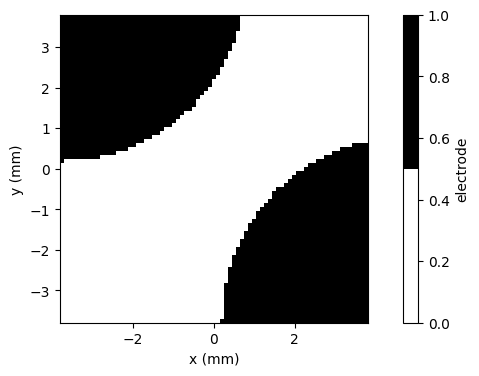

In [63]:
# z grid position
zg = 75
el = fa.electrode

# electrodes
fig, ax = plt.subplots(figsize=(9, 4))
c0 = ax.imshow(el[:, :, zg].T, origin='lower', extent=fa.extent[:4] / milli, cmap=bool_cmap, vmin=0, vmax=1)
cbar = fig.colorbar(c0, label='electrode')
ax.set_aspect('equal')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.show()

## electric potential

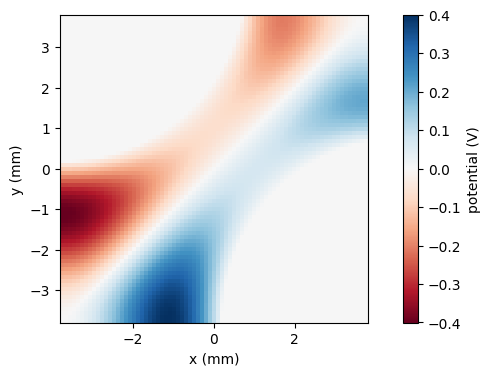

In [72]:
voltages = np.array([20, -20], dtype='float64')
phi = fa.potential(voltages)

# potential
fig, ax = plt.subplots(figsize=(9, 4))
c0 = ax.imshow(phi[:, :, zg].T, origin='lower', extent=fa.extent[:4] / milli, cmap='RdBu')
cbar = fig.colorbar(c0, label='potential (V)')
ax.set_aspect('equal')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.show()

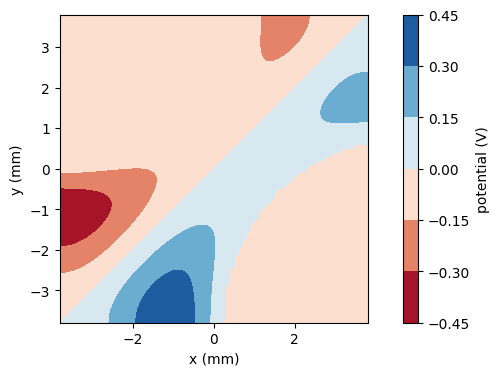

In [67]:
X, Y, Z = fa.grid()

# potential
fig, ax = plt.subplots(figsize=(9,4))
c0 = ax.contourf(X[:, :, zg] * 1e3, Y[:, :, zg] * 1e3, phi[:, :, zg], cmap='RdBu')
cbar = fig.colorbar(c0, label='potential (V)')
ax.set_aspect('equal')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.show()

## electric field

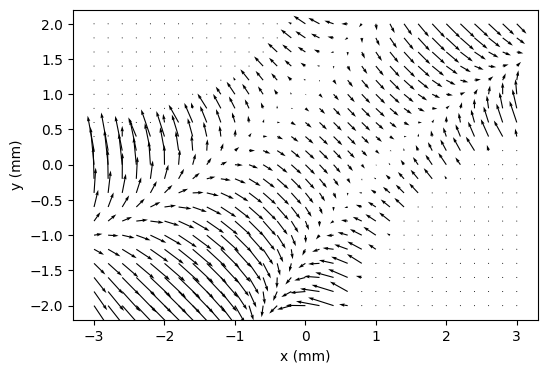

In [68]:
# subset 
xmin, ymin, zmin = np.round(fa.grid_r((-0.003, -0.002, 0)))
xmax, ymax, zmax = np.round(fa.grid_r((0.0032, 0.0022, 0)))
subset = (slice(int(xmin), int(xmax), 2), slice(int(ymin), int(ymax), 2), zg)

# field
ex, ey, ez = fa.field(voltages)

fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(X[subset] * 1e3, Y[subset] * 1e3, ex[subset], ey[subset], angles='xy')
ax.set_aspect('equal')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.show()

## field amplitude

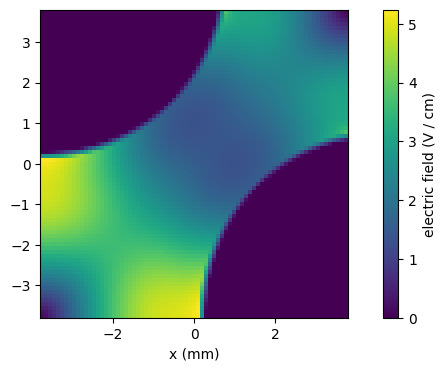

In [69]:
famp = fa.amp_field(voltages)

fig, ax = plt.subplots(figsize=(9, 4))
c0 = ax.imshow(famp[:, :, zg].T * centi, origin='lower', extent=fa.extent[:4] / milli, cmap='viridis')
cbar = fig.colorbar(c0, label='electric field (V / cm)')
ax.set_aspect('equal')
ax.set_xlabel('x (mm)')
plt.show()

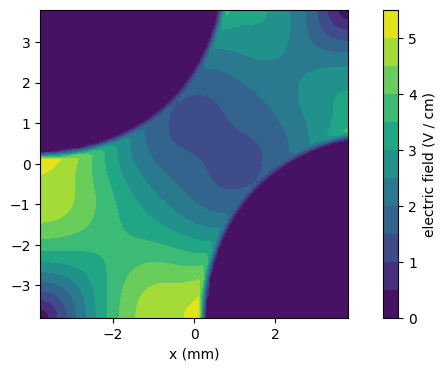

In [70]:
fig, ax = plt.subplots(figsize=(9,4))
c0 = ax.contourf(X[:, :, zg] * 1e3, Y[:, :, zg] * 1e3, famp[:, :, zg] * centi, 12, cmap='viridis')
cbar = fig.colorbar(c0, label='electric field (V / cm)')
ax.set_aspect('equal')
ax.set_xlabel('x (mm)')
plt.show()

## field gradient

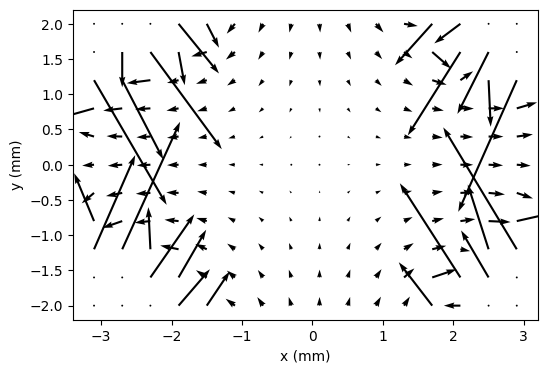

In [57]:
gx, gy, gz = fa.grad_field(voltages)

fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(X[subset] * 1e3, Y[subset] * 1e3, gx[subset], gy[subset], angles='xy')
ax.set_aspect('equal')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.show()

## point calculations

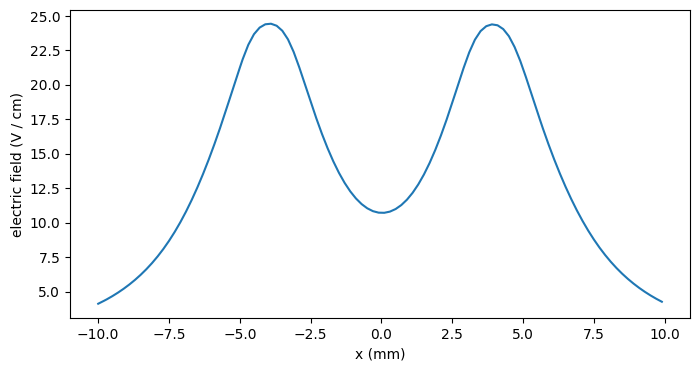

In [58]:
xvals = np.arange(-10, 10, .1) * 1e-3
fvals = [fa.amp_field_r((x, 0, 0.075), voltages) * centi for x in xvals]

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xvals / milli, fvals)
ax.set_ylabel('electric field (V / cm)')
ax.set_xlabel('x (mm)')
plt.show()

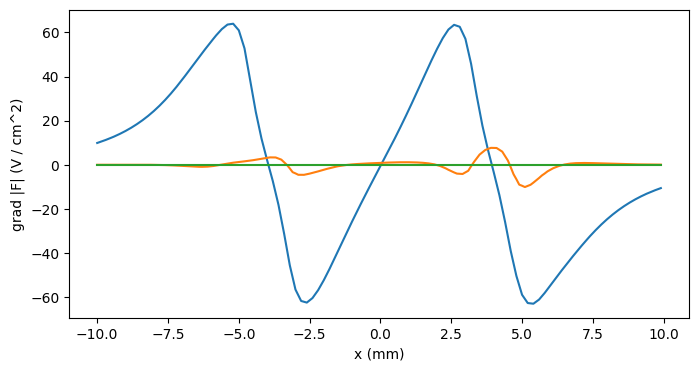

In [59]:
gx, gy, gz = np.array([np.array(fa.grad_field_r((x, 0, 0.075), voltages)) * centi**2.0 for x in xvals]).T

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xvals / milli, gx)
ax.plot(xvals / milli, gy)
ax.plot(xvals / milli, gz)
ax.set_ylabel('grad |F| (V / cm^2)')
ax.set_xlabel('x (mm)')
plt.show()

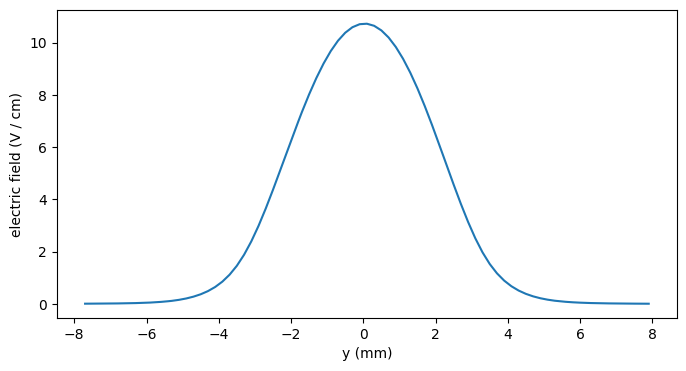

In [60]:
yvals = np.arange(-8, 8, .1) * 1e-3
fvals = [fa.amp_field_r((0, y, 0.075), voltages) * centi for y in yvals]

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(yvals / milli, fvals)
ax.set_ylabel('electric field (V / cm)')
ax.set_xlabel('y (mm)')
plt.show()

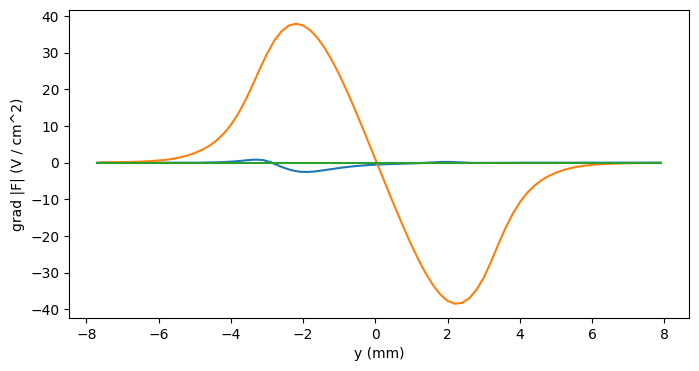

In [61]:
gx, gy, gz = np.array([np.array(fa.grad_field_r((0, y, 0.075), voltages)) * centi**2.0 for y in yvals]).T

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(yvals / milli, gx)
ax.plot(yvals / milli, gy)
ax.plot(yvals / milli, gz)
ax.set_ylabel('grad |F| (V / cm^2)')
ax.set_xlabel('y (mm)')
plt.show()